In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns

In [19]:
MUDE_guesses = pd.read_csv("../../data/Prediction_2024.txt", sep='\t')
MUDE_guesses['datetime'] = pd.to_datetime(MUDE_guesses[['Year', 'Month', 'Day', 'Hour', 'Minute']])
time_decimal = MUDE_guesses['datetime'].dt.hour + MUDE_guesses['datetime'].dt.minute / 60


ice_data = pd.read_csv('../../data/BreakUpTimes.csv')
ice_data['datetime'] = pd.to_datetime(ice_data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
time_decimal2 = ice_data['datetime'].dt.hour + ice_data['datetime'].dt.minute / 60

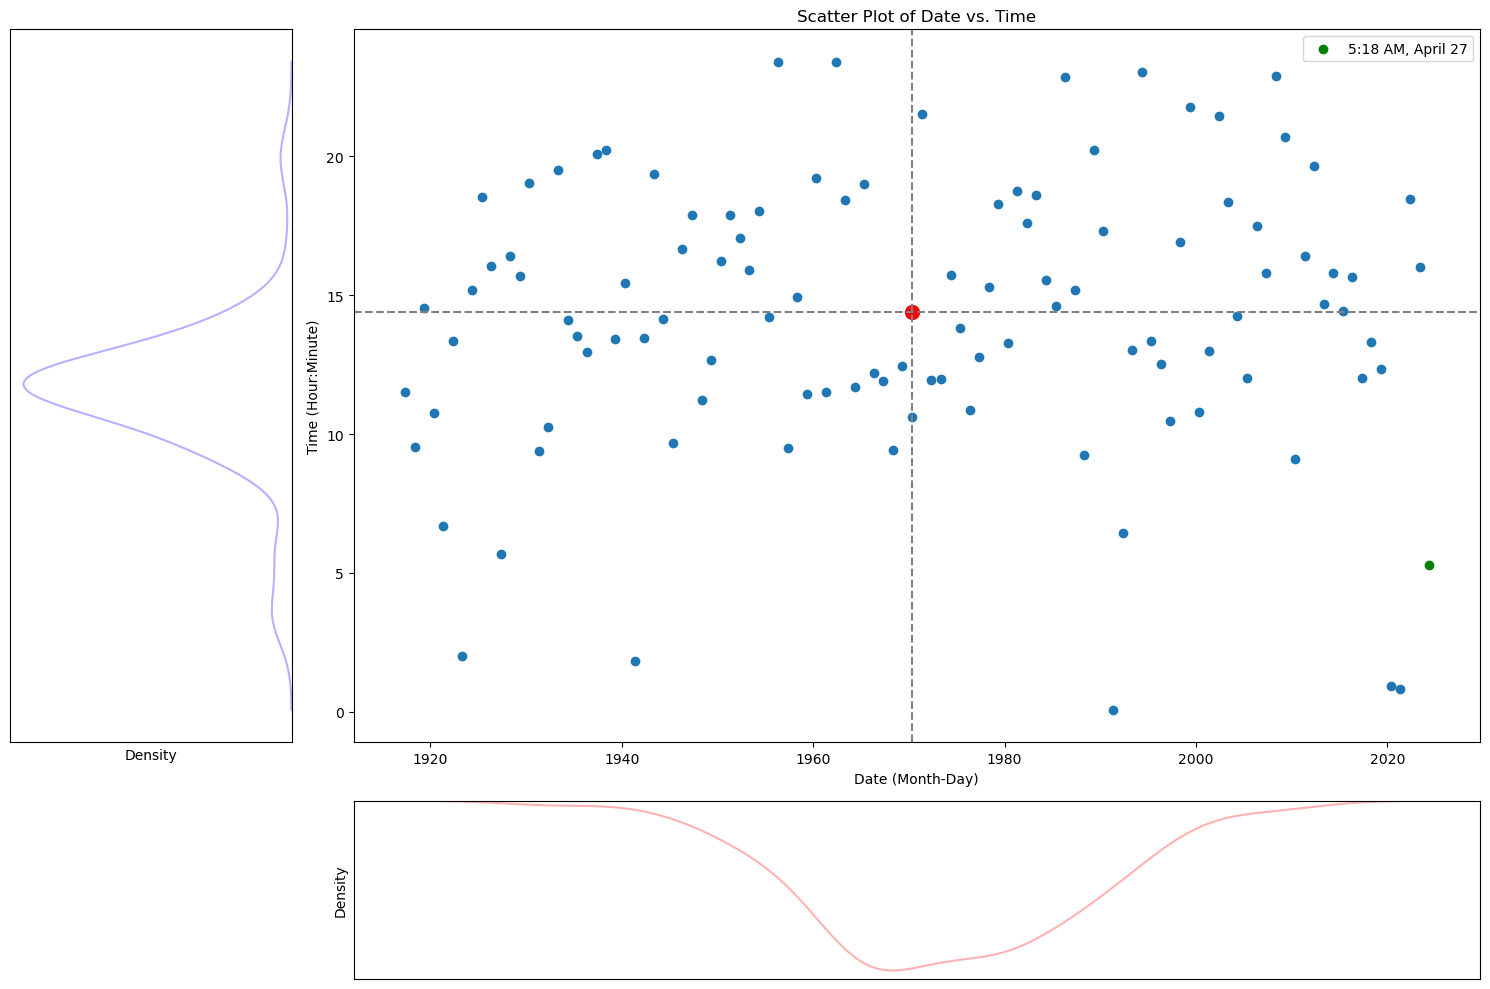

In [21]:
fig, axs = plt.subplots(figsize=(15, 10))

plt.scatter(ice_data['datetime'])

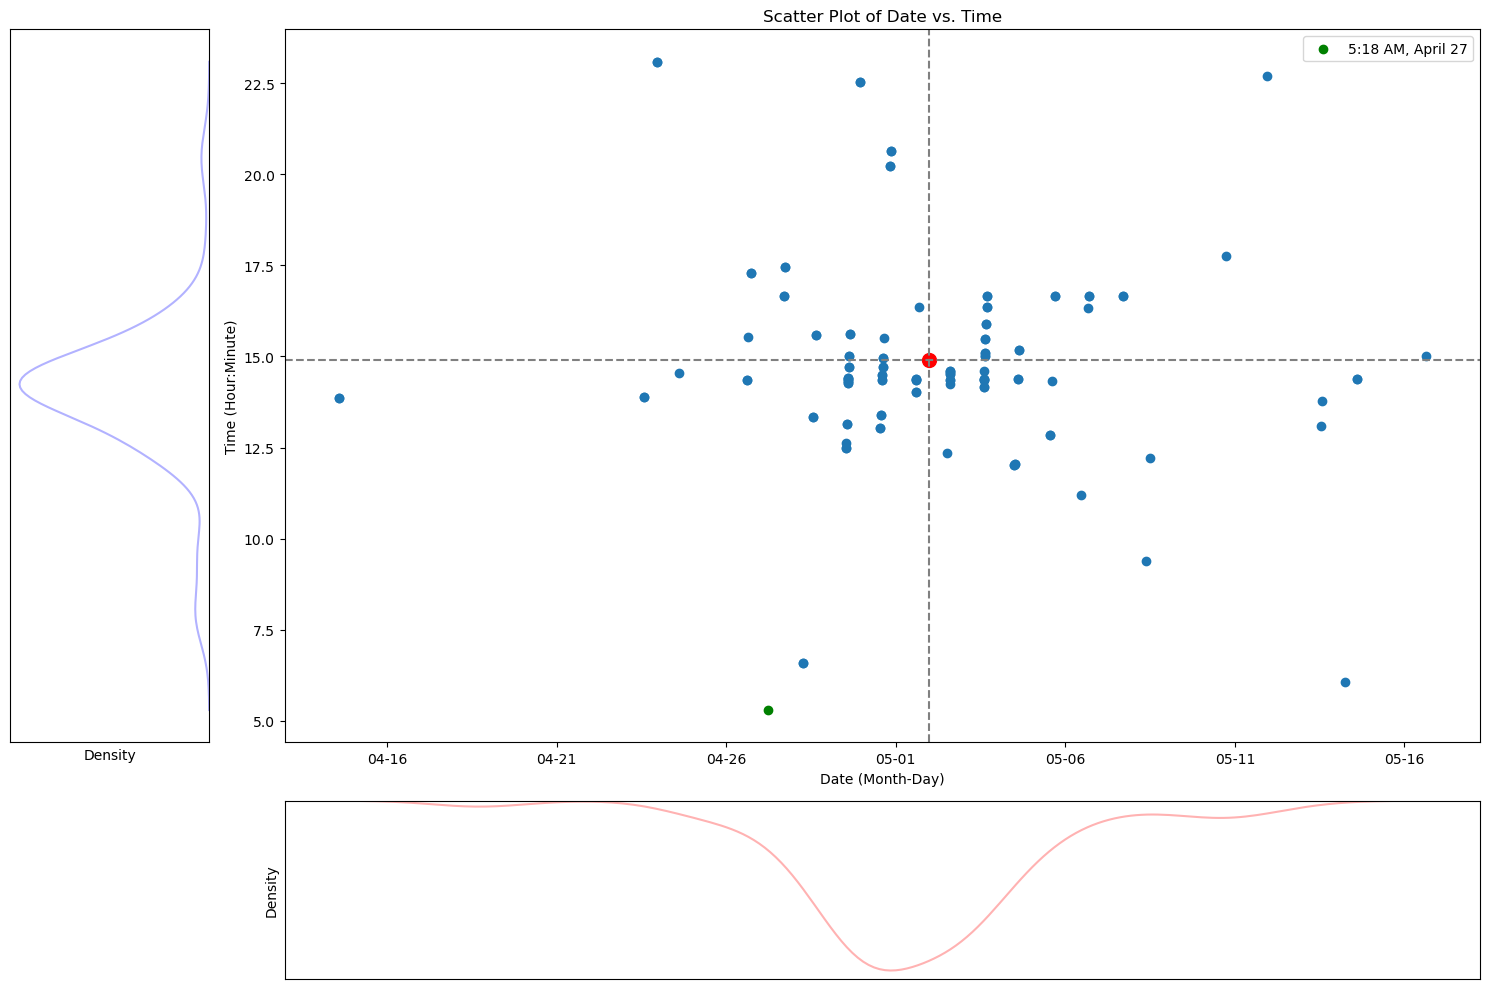

In [23]:
#import matplotlib.pyplot as plt

# Create subplots with adjusted size ratio
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 6], 'height_ratios': [4, 1]})

# Scatter plot in top right corner
axs[0, 1].scatter(MUDE_guesses['datetime'], time_decimal)
axs[0, 1].set_xlabel('Date (Month-Day)')
axs[0, 1].set_ylabel('Time (Hour:Minute)')
axs[0, 1].set_title('Scatter Plot of Date vs. Time')

# Calculate mean of x and mean of y
mean_x = MUDE_guesses['datetime'].mean()
mean_y = time_decimal.mean()

# Plot mean of x and mean of y as points on the scatter plot
axs[0, 1].plot(mean_x, mean_y, 'ro', markersize=10)  # 'ro' for red color and circle marker

# Add vertical and horizontal lines associated with the mean point
axs[0, 1].axvline(x=mean_x, color='gray', linestyle='--')  # Vertical line
axs[0, 1].axhline(y=mean_y, color='gray', linestyle='--')  # Horizontal line

# Add scatter point for 5:18 AM on the 27th of April
specific_time = pd.Timestamp('2024-04-27 05:18:00')
specific_time_decimal = specific_time.hour + specific_time.minute / 60
axs[0, 1].scatter(specific_time, specific_time_decimal, color='green', marker='o', label='5:18 AM, April 27')

# Set x-axis format to display only month and day and ticks separated by 5 days
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
axs[0, 1].xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Density plot for x-axis in position (2, 2)
sns.kdeplot(data=MUDE_guesses['datetime'].dt.dayofyear, ax=axs[1, 1], color='red', alpha=0.3)
axs[1, 1].set_ylabel('Density')
axs[1, 1].set_yticklabels([])  # Remove y-axis labels
axs[1, 1].set_xlabel('')
axs[1, 1].invert_yaxis()

# Density plot for x-axis in position (0, 0)
sns.kdeplot(y=time_decimal, ax=axs[0, 0], color='blue', alpha=0.3)
axs[0, 0].set_xlabel('Density')
axs[0, 0].set_ylabel('')
axs[0, 0].invert_yaxis()
axs[0, 0].invert_xaxis()

# Remove ticks from side plots
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

# Hide the empty subplot
axs[1, 0].axis('off')

# Add legend
axs[0, 1].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
